# Pixels and Image Filtering 

### 1.1 Import the packages and load the image

Download data from google drive and load it

You should show one image after this block



notes: if the google drive link is dead, you can download the data directly from the URL

URL: https://drive.google.com/uc?id=1Ty-WbJCUFQmIL7IB4vZbMt25ovTH1_qF

Downloading...
From: https://drive.google.com/uc?id=1Ty-WbJCUFQmIL7IB4vZbMt25ovTH1_qF
To: /content/front.jpeg
100% 298k/298k [00:00<00:00, 37.7MB/s]


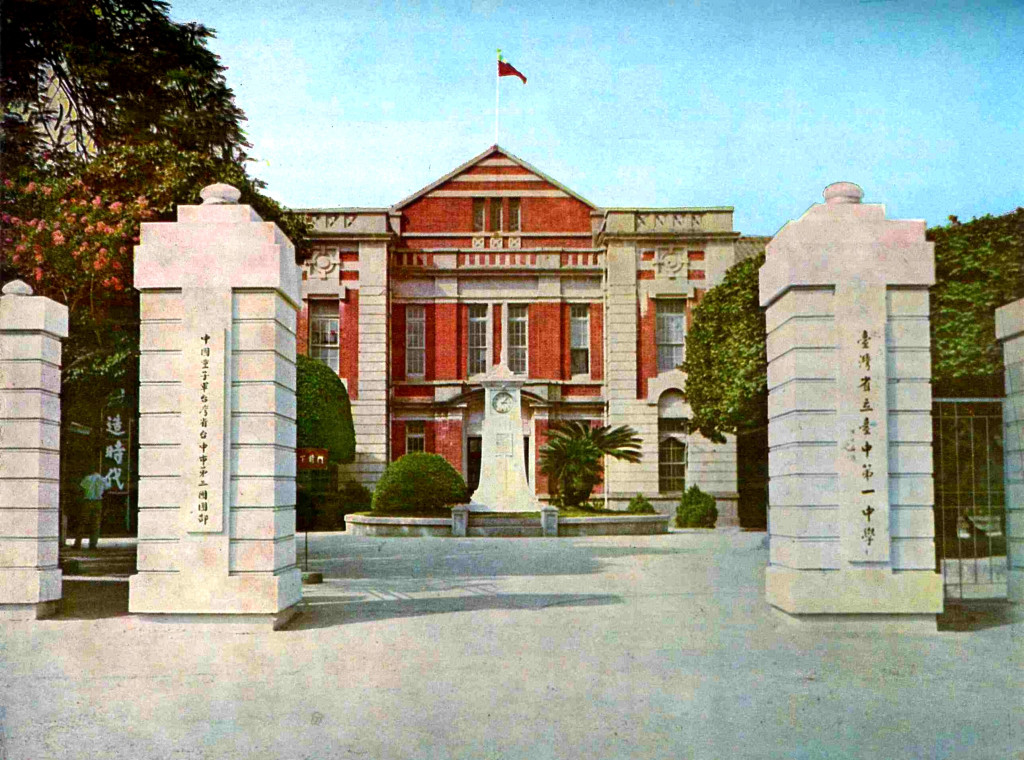

In [27]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive

#download the image via file_id 
!gdown --id '1Ty-WbJCUFQmIL7IB4vZbMt25ovTH1_qF' --output front.jpeg
#using opencv to load and show the image
img = cv2.imread('./front.jpeg')
cv2_imshow(img)

### 1.2 Grayscale

Using OpenCV convert original image to grayscale image

You should show one grayscale image after this block

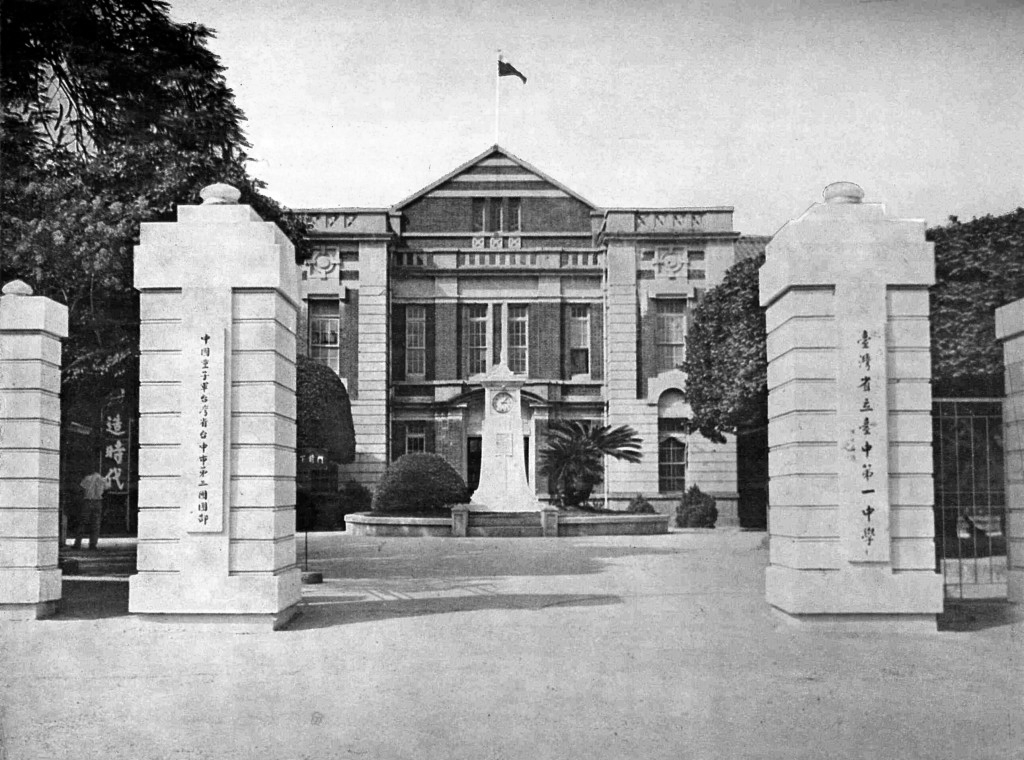

In [28]:
#using opencv to graysclae image
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayImg)

# Sobel Operator

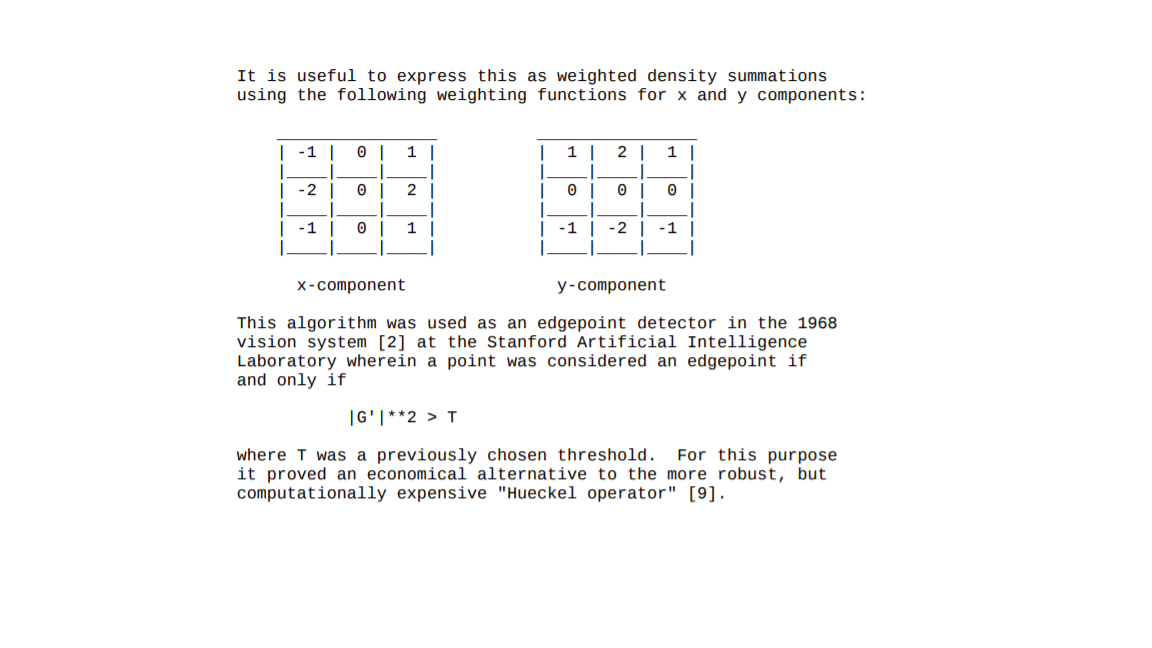

Reference:Sobel, Irwin. (2014). An Isotropic 3x3 Image Gradient Operator. Presentation at Stanford A.I. Project 1968. 


---







### 2.1 Padding



When we are doing image processing, the boundary often encounters problems that cannot be smoothly calculated.

One of solution is using padding to avoid the boundary problem





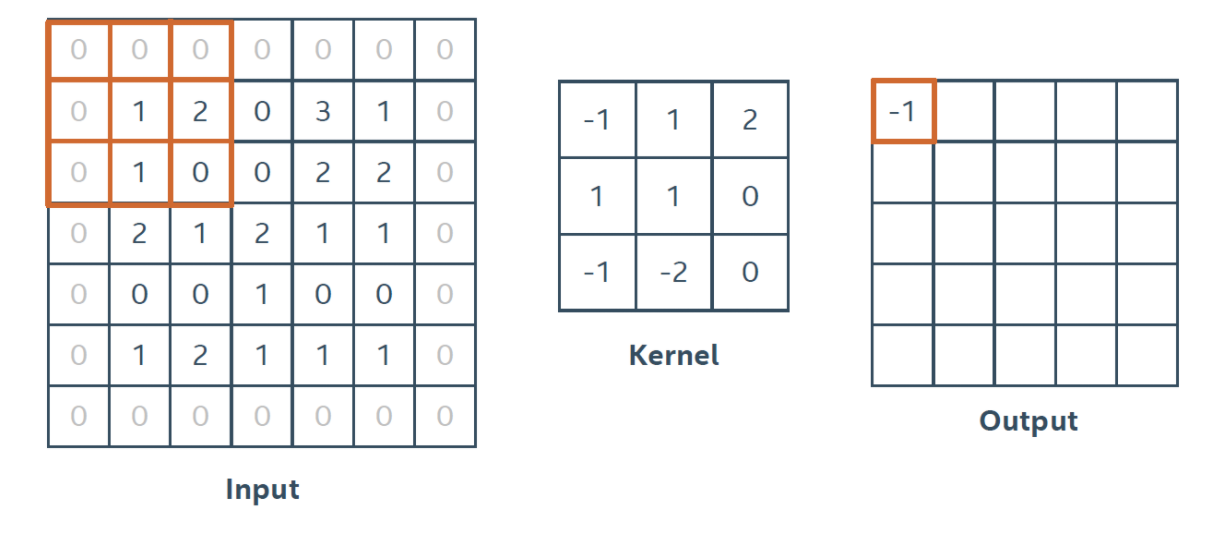



---



Use numpy to padding the 3*4 sequential matix 

Hint : np.pad ( [input_img] , [width] , 'constant' )

You should print two array after this block

1. 3X4 sequential matix

2. 3X4 sequential matix with padding

In [29]:
import numpy as np
#make the 3*4 sequential numpy array and print it
#hint write it directly or use np.arrange with np.reshape 
arrSeq = np.arange(12).reshape((3, 4))
print(arrSeq)
 
#using np.pad to padding array with zeros and width=1 and print it
#hint:np.pad([input],[padding_width],'constant')
print(np.pad (arrSeq , 1, 'constant'))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  0  0  0  0  0]
 [ 0  0  1  2  3  0]
 [ 0  4  5  6  7  0]
 [ 0  8  9 10 11  0]
 [ 0  0  0  0  0  0]]


### **2.2 Sobel y_component**
Use Sobel y_component operator to do the image processing

Stride=1

Threshold=250

You should show image with Sobel y_component processing after this block

(760, 1024)


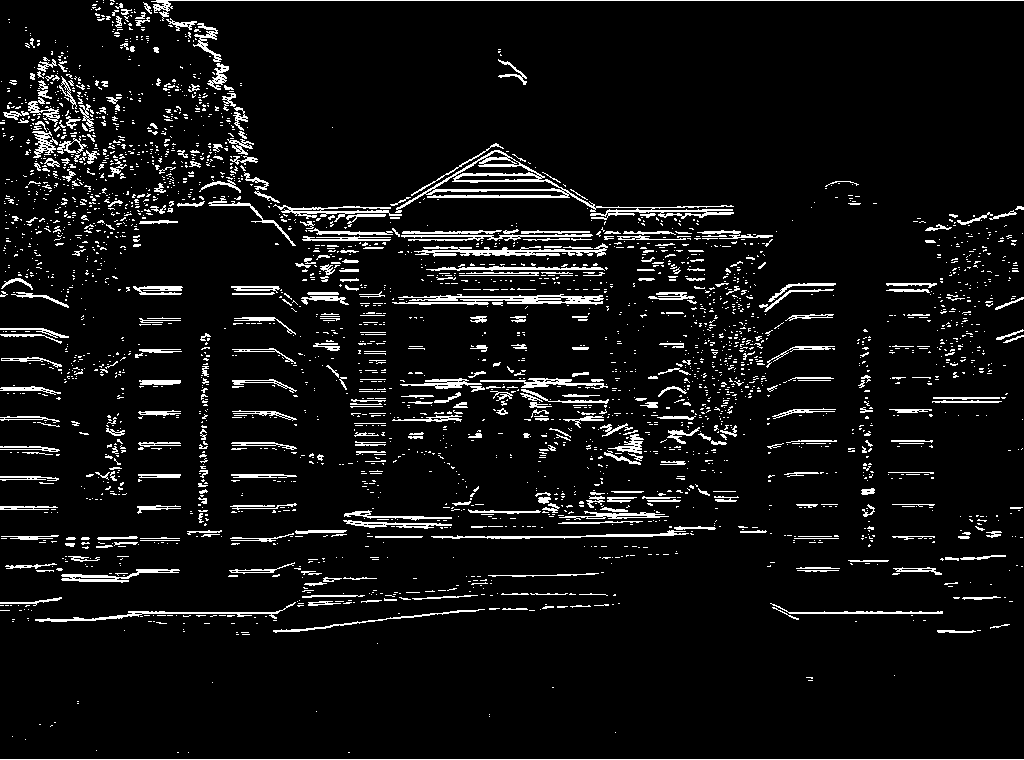

In [30]:
def sobel_y_operator (input,threshold):
  #create the numpy zeros array and its shape like input image
  print(input.shape)
  img_y=np.zeros(input.shape)
  #create the sobel y-component filter
  sobel_y=np.array([1,2,1,
                    0,0,0,
                    -1,-2,-1]).reshape(3,3)

  #padding the input image with zeros ann the width equal to the filter center to the boundary
  input_padding=np.pad(input,int(sobel_y.shape[0]/2),'constant') 

  #do the Sobel filter and avoid processing outside the boundary
  for row in range(int(sobel_y.shape[0]/2),input_padding.shape[0]-int(sobel_y.shape[0]/2)):
    for col in range(int(sobel_y.shape[1]/2),input_padding.shape[1]-int(sobel_y.shape[1]/2)):
      Gy=np.sum(input_padding[row-int(sobel_y.shape[0]/2):row+int(sobel_y.shape[0]/2)+1,
                              col-int(sobel_y.shape[1]/2):col+int(sobel_y.shape[1]/2)+1]*sobel_y)
      
      #compute G
      G=np.sqrt(Gy**2+Gy**2)
      #compare with threshold >T =255 <T =0
      if G > threshold:
        img_y[row-int(sobel_y.shape[0]/2),col-int(sobel_y.shape[1]/2)]= 255 
      else:
        img_y[row-int(sobel_y.shape[0]/2),col-int(sobel_y.shape[1]/2)]= 0
    
  return img_y
 
cv2_imshow(sobel_y_operator(grayImg,250))

### **2.3 Sobel x_component**

Base on Sobel y_component operator you can do Sobel x_component operator easily

Hint: Only need to fix one array

You should show image with Sobel x_component processing after this block

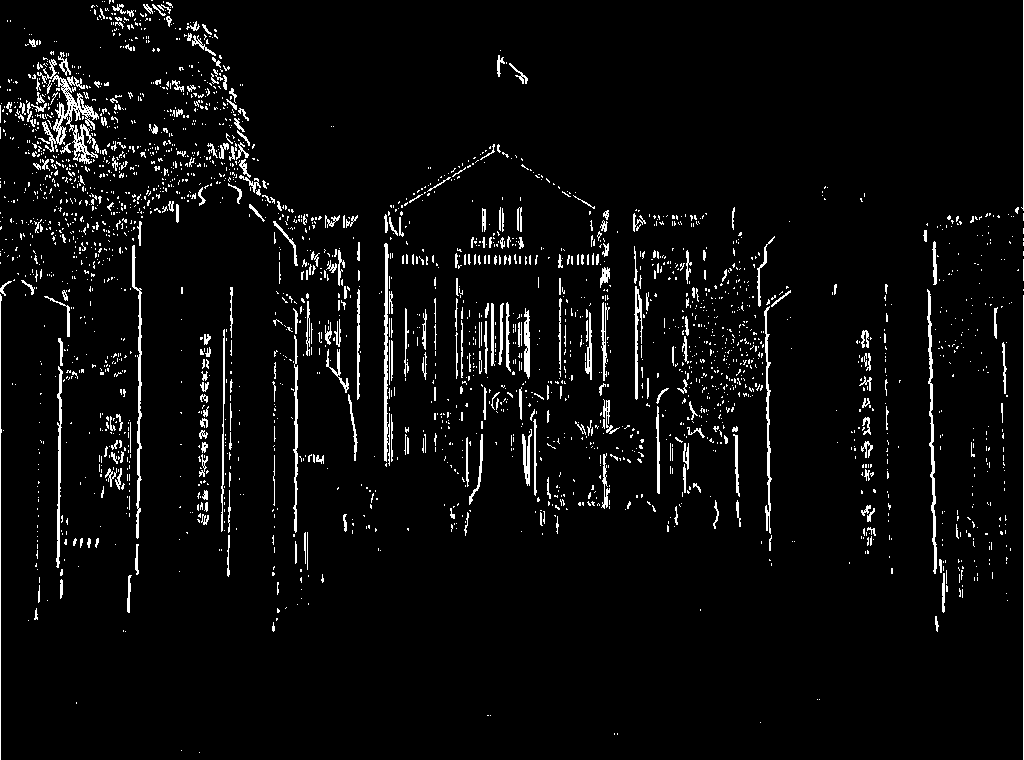

In [ ]:
def sobel_x_operator (input,threshold):
  #create the numpy zeros array and its shape like input image
  img_x=np.zeros(input.shape)
  #create the sobel x-component filter
  sobel_x=np.array([-1,0,1,
                    -2,0,2,
                    -1,0,1]).reshape(3,3)

  #padding the input image with zeros ann the width equal to the filter center to the boundary
  input_padding=np.pad(input,int(sobel_x.shape[0]/2),'constant') 

  #do the Sobel filter and avoid processing outside the boundary
  for row in range(int(sobel_x.shape[0]/2),input_padding.shape[0]-int(sobel_x.shape[0]/2)):
    for col in range(int(sobel_x.shape[1]/2),input_padding.shape[1]-int(sobel_x.shape[1]/2)):
      Gx=np.sum(input_padding[row-int(sobel_x.shape[0]/2):row+int(sobel_x.shape[0]/2)+1,
                              col-int(sobel_x.shape[1]/2):col+int(sobel_x.shape[1]/2)+1]*sobel_x)
      
      #compute G
      G=np.sqrt(Gx**2+Gx**2)
      #compare with threshold >T =255 <T =0
      if G > threshold:
        img_x[row-int(sobel_x.shape[0]/2),col-int(sobel_x.shape[1]/2)]= 255 
      else:
        img_x[row-int(sobel_x.shape[0]/2),col-int(sobel_x.shape[1]/2)]= 0
    
  return img_x
 
cv2_imshow(sobel_x_operator(grayImg,250))

### **2.4 Sobel**

So now you have the Sobel x and y components, merge them and you can get the complete Sobel operator

Hint: fix the code from last one you will get result easily

You should show image with Sobel operator processing after this block

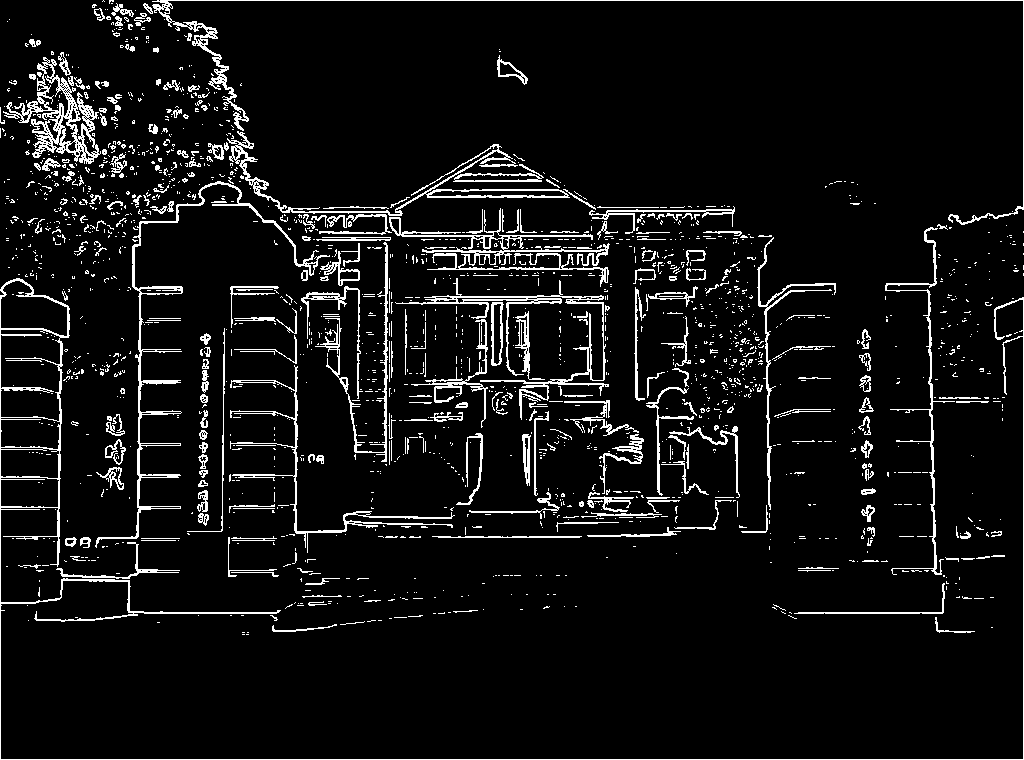

In [ ]:
def sobel_operator (input,threshold):
  #create the numpy zeros array and its shape like input image
  img_new=np.zeros(input.shape)
  #create sobel x and y component respectively
  sobel_x=np.array([-1,0,1,
                    -2,0,2,
                    -1,0,1]).reshape(3,3)
  sobel_y=np.array([1,2,1,
                    0,0,0,
                    -1,-2,-1]).reshape(3,3)  
  #padding
  input_padding=np.pad(input,int(sobel_x.shape[0]/2),'constant') 

  #do the Sobel filter and avoid processing outside the boundary
  for row in range(int(sobel_x.shape[0]/2),input_padding.shape[0]-int(sobel_x.shape[0]/2)):
    for col in range(int(sobel_x.shape[1]/2),input_padding.shape[1]-int(sobel_x.shape[1]/2)):
      Gx=np.sum(input_padding[(row-int(sobel_x.shape[0]/2)):(row+int(sobel_x.shape[0]/2)+1),(col-int(sobel_x.shape[1]/2)):(col+int(sobel_x.shape[1]/2))+1]*sobel_x)
      Gy=np.sum(input_padding[(row-int(sobel_x.shape[0]/2)):(row+int(sobel_x.shape[0]/2)+1),(col-int(sobel_x.shape[1]/2)):(col+int(sobel_x.shape[1]/2))+1]*sobel_y)
      
      #compute G
      G=np.sqrt(Gx**2+Gy**2)
      #compare with threshold >T =255 <T =0
      if G > threshold:
        img_new[row-int(sobel_x.shape[0]/2),col-int(sobel_x.shape[1]/2)]= 255 
      else:
        img_new[row-int(sobel_x.shape[0]/2),col-int(sobel_x.shape[1]/2)]= 0
    
  return img_new
 
cv2_imshow(sobel_operator(grayImg,250))

# Bonus

This section has three parts, and the first two parts are just to show you how to make Gaussian filter and plot it.

### **3.1 Make Gaussian filter**

Notice: just click run!

In [ ]:
def make_5x5_gaussian_filter (sigma):
  #create 5X5 array as filter
  gaussian_filter=np.zeros([5,5])
  #use gaussian distribution to write filter 
  for row in range (5):
    for col in range (5):
      gaussian_filter[row,col]=1/(2*np.pi*sigma**2)*np.e**(-((col-2)**2+(row-2)**2)/(2*(sigma**2)))
  #normalization
  gaussian_filter=gaussian_filter/np.sum(gaussian_filter)
  #retrun filter
  return gaussian_filter
print(make_5x5_gaussian_filter(1))

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


### **3.2 Mayplotlib**

Notice: just click run!

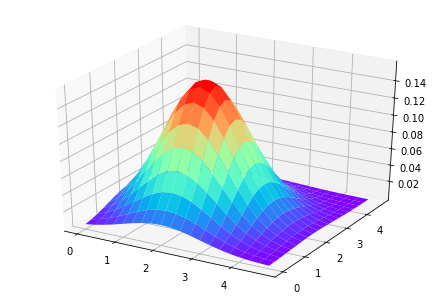

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
# X, Y value 
f=make_5x5_gaussian_filter (1)
X = np.arange(0, f.shape[1], 0.25)
Y = np.arange(0, f.shape[0], 0.25)
X, Y = np.meshgrid(X, Y)    # x-y mesh
sigma=1
# height value
R = 1/(2*np.pi*sigma**2)*np.e**(-((X-2)**2+(Y-2)**2)/(2*(sigma**2)))

ax.plot_surface(X, Y, R, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

### **3.3 Gaussian filter**

Try to do Gaussian filter without fountion
 
Hint:    Like Sobel but something different!
 
Notice:   Do not just call function or you will get zero

You should show image with Gaussian filter processing after this block

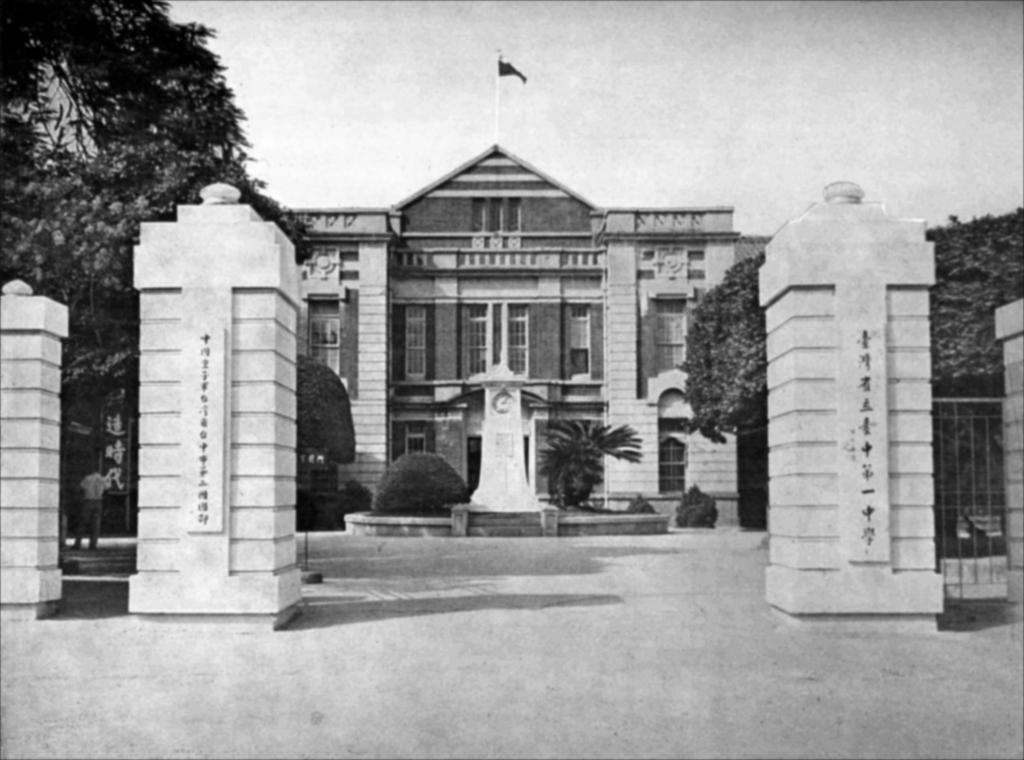

In [ ]:
def guassian_process(image, kernel):

    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + int(kernel.shape[0]/2)*2, image.shape[1] + int(kernel.shape[1]/2)*2))
    image_padded[int(kernel.shape[0]/2):-int(kernel.shape[0]/2), int(kernel.shape[0]/2):-int(kernel.shape[0]/2)] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x]=(kernel * image_padded[y: y+5, x: x+5]).sum()

    return output

# kernel to be used to get sharpened image
guassianFilter = make_5x5_gaussian_filter(1)
image_guassian = guassian_process(grayImg, guassianFilter)
cv2_imshow(image_guassian)